PENDOLO SEMPLICE
================

### SCOPI PRINCIPALI DELL’ESPERIENZA ###

* Verificare che misure ripetute ottenute in presenza di incertezze casuali si distribuiscono secondo la distribuzione normale (gaussiana).
* Determinare il valore dell’accelerazione di gravità.

### PRINCIPI FISICI SU CUI SI BASA L’ESPERIENZA ###

* Il *pendolo semplice* è costituito da un punto materiale di massa $m$ appeso a un supporto per mezzo di un filo inestensibile e di massa trascurabile. La posizione di equilibrio statico è quella in cui il filo è verticale e la massa è nella posizione più bassa. Se allontanato dalla posizione di equilibrio il punto inizia ad oscillare nel piano verticale lungo un arco di circonferenza.
* Sulla massa $m$ agiscono la tensione del filo $\mathbf{T}_\mathrm{filo}$ e la forza peso $m \mathbf{g}$. L’equazione del moto è quindi:
$$ \mathbf{T}_\mathrm{filo} + m \mathbf{g} = m \mathbf{a} $$
* La massa $m$ oscilla lungo un arco di circonferenza di raggio $L$. La proiezione dell'equazione del moto lungo la direzione tangente alla traiettoria è:
$$ - m g \sin \theta = m a_\theta= m L \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}$$
* Se le oscillazioni sono piccole ($\theta\lesssim 0.122\, \mathrm{rad}\simeq 7^\circ$), si può approssimare $\sin \theta$ con $\theta$, e si ottiene:
$$\frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+\frac{g}{L}\theta=0$$ che (ponendo $\omega^2 = g/L $) ammette la soluzione:     
$$\theta = \theta_0 \sin (\omega t + \varphi )$$
* Il moto è quindi periodico con periodo 
$$T=2\pi\sqrt{\frac{L}{g}}$$

### ESECUZIONE DELL’ESPERIENZA ###

* Per avere angoli < $7^\circ$, spostare la sferetta dalla posizione di equilibrio di una distanza pari ad $\frac{1}{10}$ del valore di $L$ scelto. In questo modo $\theta = \arctan \frac{1}{10 } = 5.7^\circ$.
* La misura del periodo di oscillazione viene eseguita con un cronometro, misurando il tempo di $n$ ($\ge 5$) oscillazioni, e dividendo il risultato ottenuto per $n$.
* Si esegue la misura del raggio della sferetta $r$, della lunghezza del filo $l$ e si determina la lunghezza $L=r+l$ del pendolo, valutando l’incertezza $\Delta L$ di tale stima.
* Si esegue un elevato numero di misure (circa 100) del periodo $T$ di oscillazione del pendolo, per un valore fissato della lunghezza $L$ (Obiettivo 1).
* Si esegue un numero adeguato di misure ($\ge 5$) del periodo $T$ di oscillazione del pendolo per diversi (almeno 5) valori di lunghezza $L$ (Obiettivo 2).

In [ ]:
### Analisi dei dati ###

In [1]:
# Carico le librerie matematiche, grafiche e statistiche

%pylab inline

from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Inserire qui il vettore T contenente le misure sperimentali del periodo del pendolo [s]:


T = array([1.89,
1.89,
1.88,
1.862,
1.886,
1.88,
1.89,
1.886,
1.892,
1.87,
1.92,
1.906,
1.912,
1.882,
1.92,
1.89,
1.92,
1.902,
1.93,
1.912,
1.9,
1.894,
1.87,
1.89,
1.902,
1.902,
1.912,
1.9,
1.896,
1.902,
1.882,
1.904,
1.906,
1.886,
1.882,
1.9,
1.922,
1.892,
1.902,
1.912,
1.89,
1.886,
1.91,
1.9,
1.91,
1.902,
1.896,
1.902,
1.876,
1.902,
1.91,
1.896,
1.89,
1.9,
1.91,
1.896,
1.906,
1.922,
1.906,
1.91,
1.906,
1.91,
1.902,
1.89,
1.916,
1.922,
1.936,
1.902,
1.896,
1.906,
1.906,
1.906,
1.922,
1.932,
1.926,
1.906,
1.902,
1.912,
1.922,
1.912,
1.912,
1.92,
1.91,
1.916,
1.9,
1.91,
1.91,
1.902,
1.88,
1.92,
1.92,
1.916,
1.916,
1.91,
1.886,
1.91,
1.902,
1.9,
1.892,
1.908
])

N       = len(T)                         # calcolo la lunghezza del vettore T, cioè il numero di misure effettuate

Tmedio  = mean(T)                        
Tstd    = std(T)

print 'T = %4.2f +/- %4.2f s'%(Tmedio,Tstd)

T = 1.90 +/- 0.01 s


In [3]:
# Genero un vettore di valori di g calcolati a partire dalle misure di T usando la formula teorica
# nella quale qui per esempio ho posto L=1
# Eseguo poi una stima diretta dell'errore su g 

L = 0.911   # m
g=4*pi**2*L/T**2
gmedio=mean(g)
gstd=std(g)
print 'g = %4.2f +/- %4.2f m/s**2  (errore stimato direttamente)'%(gmedio,gstd)

g = 9.94 +/- 0.15 m/s**2  (errore stimato direttamente)


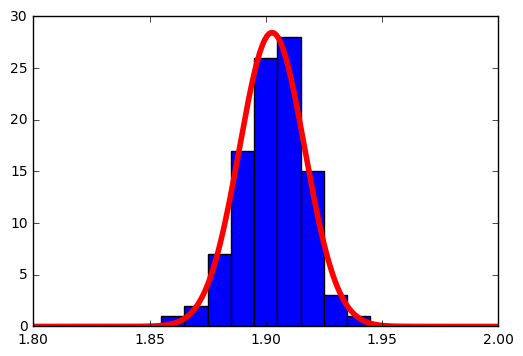

In [5]:
# Creo una suddivisione dell'intervallo [0,A] in classi di ampiezza dT=0.15
# traslo tutte le classi di dT/2 per centrarle rispetto all'origine

dT    = 0.01
# ampiezza delle classi
A     = 2*Tmedio                         # ampiezza dell'intervallo [0,A]
bins  = arange(1.8,2.0,dT)+dT/2.             # estremi delle classi

# Creo un istogramma delle misure
# (si noti la differenza tra normed=True e normed=False)

hist(T,bins,normed=True)

# Sovrappongo all'istogramma il grafico della funzione a campana di Gauss

x     = linspace(1.8,2.0,200)
plot(x,stats.norm.pdf(x,loc=Tmedio,scale=Tstd),'r',linewidth=4)

savefig('istogramma_T5.pdf')                # salvo la figura con l'istogramma

accelerazione di gravità misurata: g = 9.56


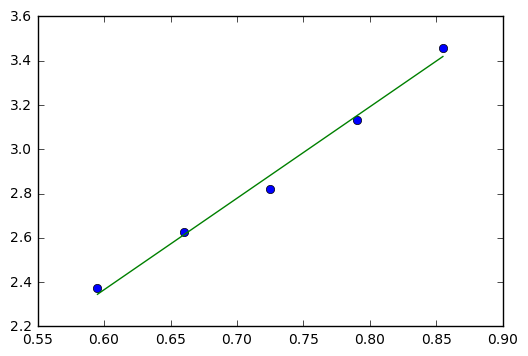

In [45]:
# Metodo dei minimi quadrati

# Inserire qui i valori sperimentali:

L    = array([0.855,0.790,0.725,0.660,0.595])
T    = array([1.86,1.77,1.68,1.62,1.54])

plot(L,T**2,'o')

from scipy.stats import linregress

m,q,r,p,stderr=linregress(L,T**2)

plot(L,m*L+q)

gmes  = 4*pi**2/m
print 'accelerazione di gravità misurata: g = %4.2f'%gmes

# Calcolare l'incertezza su g utilizzando le formule di propagazione dell'incertezza riportate nella scheda

In [46]:
?linregress

In [49]:
from pandas import DataFrame
data={'L':L,'T':T}
df=DataFrame(data)
df

,L,T
0,0.855,1.86
1,0.790,1.77
2,0.725,1.68
3,0.660,1.62
4,0.595,1.54
